In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
Health_df = pd.read_csv('diabetes.csv')
Health_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Health_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
Health_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
Health_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
0 in Health_df['Glucose'].values

True

In [7]:
Health_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
Health_df.drop('Outcome',axis = 1,inplace = True)


In [9]:
Health_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [10]:
Health_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [11]:
Health_df['Glucose'] = Health_df['Glucose'].replace(0,Health_df['Glucose'].mean())
Health_df['BloodPressure'] = Health_df['BloodPressure'].replace(0,Health_df['BloodPressure'].mean())
Health_df['SkinThickness'] = Health_df['SkinThickness'].replace(0,Health_df['SkinThickness'].mean())
Health_df['Insulin'] = Health_df['Insulin'].replace(0,Health_df['Insulin'].mean()) 
Health_df['BMI'] = Health_df['BMI'].replace(0,Health_df['BMI'].mean())
Health_df['Age'] = Health_df['Age'].replace(0,Health_df['Age'].mean())
Health_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54


In [12]:
scaler = StandardScaler()
Health_df_scaled = scaler.fit_transform(Health_df)

In [13]:
Health_df_scaled.shape

(768, 8)

In [14]:
Health_df_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

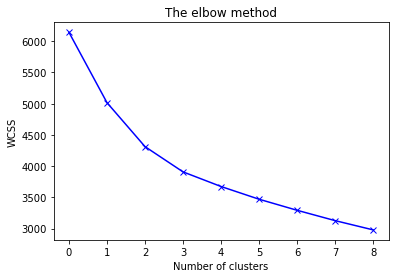

In [29]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Health_df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(wcss,'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [30]:
kmeans = KMeans(3)
kmeans.fit(Health_df_scaled)
labels = kmeans.labels_

In [31]:
kmeans.cluster_centers_.shape

(3, 8)

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [Health_df.columns])
cluster_centers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.419552,0.649536,0.119148,1.120214,1.036149,0.976184,0.506799,-0.270270
1,0.939207,0.306477,0.528083,-0.099179,-0.190206,0.082053,-0.086312,1.005813
2,-0.503458,-0.508632,-0.438535,-0.417926,-0.314519,-0.487459,-0.158754,-0.617553


In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [Health_df.columns])
cluster_centers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.432258,141.438029,73.697455,37.388508,215.042507,39.158065,0.639684,30.064516
1,7.007722,131.003454,78.648860,25.651886,100.967212,33.014586,0.443297,45.061776
2,2.149718,106.210971,66.945004,22.583951,89.403697,29.101527,0.419311,25.983051


In [34]:
labels.shape

(768,)

In [35]:
labels.max()

2

In [36]:
labels.min()

0

In [37]:
y_kmeans = kmeans.fit_predict(Health_df_scaled)
y_kmeans

array([1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2,

In [38]:
Health_df_cluster = pd.concat([Health_df, pd.DataFrame({'cluster':labels})], axis = 1)
Health_df_cluster.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,2
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,2
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,0
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,2
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,2
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,1
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,0
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [39]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(Health_df_scaled)

In [40]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,1.409153,-0.733975
1,-1.485388,0.281229
2,0.088633,-1.033262
3,-1.935771,0.493247
4,1.197622,3.533308


In [41]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,1.409153,-0.733975,1
1,-1.485388,0.281229,2
2,0.088633,-1.033262,1
3,-1.935771,0.493247,2
4,1.197622,3.533308,0


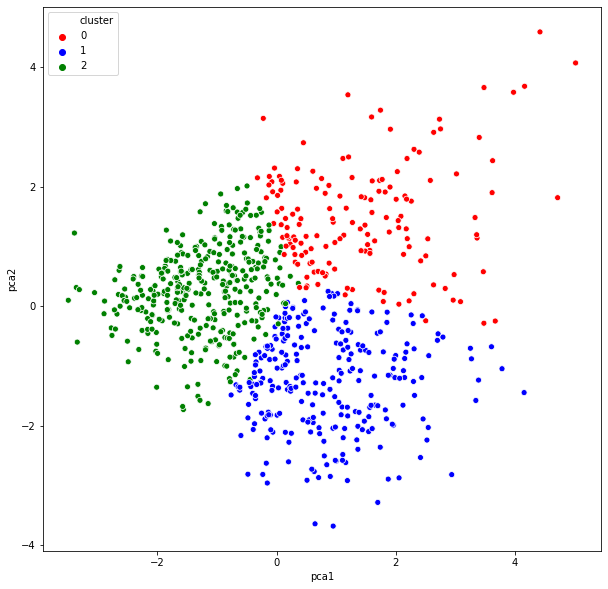

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster', data = pca_df, palette = ['red','blue','green'])
plt.show()